## 7. Import and Export

###  Sample Solutions 

### <p style='color: green'>easy</p>

#### Exercise 1 
Get the number of files in the current working directory.
#### Solution 1 

In [2]:
number_files = length(readdir())

24

#### Exercise 2
Count the number of .txt files in the current working directory.

#### Solution 2 

In [3]:
files = readdir()
txt_files = 0
for file in files
    if file[end-3:end] == ".txt"
        txt_files += 1
    end
end
txt_files


7

#### Exercise 3
Create a subfolder named "data" inside the folder of the notebook.
#### Solution 3 

In [4]:
mkpath("data")

"data"

#### Exercise 4
Create and save a vector of Float64 as a `.jls` file inside the folder "data". 
#### Solution 4 

In [5]:
using Serialization

hansi_vec = rand(100)
serialize( "data/hansi.jls",hansi_vec)

800

#### Exercise 5
 Load the `jls` file and delete it afterwards. 

#### Solution 5

In [6]:
hansi_restored = deserialize("data/hansi.jls")
rm("data/hansi.jls")

In [7]:
readdir("data")

21-element Vector{String}:
 "HUGE.png"
 "vec101.jls"
 "vec102.jls"
 "vec103.jls"
 "vec104.jls"
 "vec105.jls"
 "vec106.jls"
 "vec107.jls"
 "vec108.jls"
 "vec109.jls"
 ⋮
 "vec112.jls"
 "vec113.jls"
 "vec114.jls"
 "vec115.jls"
 "vec116.jls"
 "vec117.jls"
 "vec118.jls"
 "vec119.jls"
 "vec120.jls"

### <p style='color: orange'>medium</p>

#### Exercise 6
Create  20 vectors that each contain 30 ascending numbers like ` vec1 = [1,...,30] vec2 = [31,...,60],...`. Save each vector as seperate `.jls` file into the folder "data". 

Hint: You do not need to give each vector a name. 
#### Solution 6

In [8]:
vec_of_vec = []
for i in 1:(20*30)
    if i%30 == 0
        push!(vec_of_vec,[x for x in i-30:i])
    end
end

for (i,vec) in enumerate(vec_of_vec)
    # the +100 is added to make them automatically sorted into the right order for the next exercise
    serialize("data/vec$(i+100).jls",vec)
end
    

#### Exercise 7
Write and execute a function called import_Vectors that imports all vectors from the folder "data" and creates one big vector called HUGE that contains all the numbers in ascending order.   
#### Solution 7

In [9]:
function import_Vectors(folder_path)
    vec_paths = readdir(folder_path)
    HUGE = Int64[]
    for path in vec_paths
        append!(HUGE, deserialize(folder_path * "/" *path))
    end
    return HUGE
end

HUGE = import_Vectors("data")


MethodError: MethodError: no method matching length(::Symbol)

Closest candidates are:
  length(!Matched::Union{Base.KeySet, Base.ValueIterator})
   @ Base abstractdict.jl:58
  length(!Matched::Union{LinearAlgebra.Adjoint{T, S}, LinearAlgebra.Transpose{T, S}} where {T, S})
   @ LinearAlgebra C:\Users\ank10ki\AppData\Local\Programs\Julia-1.9.2\share\julia\stdlib\v1.9\LinearAlgebra\src\adjtrans.jl:295
  length(!Matched::Union{SparseArrays.FixedSparseVector{Tv, Ti}, SparseArrays.SparseVector{Tv, Ti}} where {Tv, Ti})
   @ SparseArrays C:\Users\ank10ki\AppData\Local\Programs\Julia-1.9.2\share\julia\stdlib\v1.9\SparseArrays\src\sparsevector.jl:95
  ...


#### Exercise 8
Apply the sinus function to Huge and plot it as a scatter plot with CairoMakie. Save the plot in the data folder. 
#### Solution 8

In [10]:
using CairoMakie

In [11]:
set_theme!(theme_black())
fig1 = Figure()
ax1 = Axis(fig1[1,1], xlabel ="HUGE")
scatter!(ax1,HUGE, sin.(HUGE), color = sin.(HUGE))
fig1


UndefVarError: UndefVarError: `HUGE` not defined

In [12]:

save("data/HUGE.png", fig1)

CairoMakie.Screen{IMAGE}


#### Exercise 9
Make sure that the import_Vector functions still works, even thought there is now a plot file as well in the data folder. 
#### Solution 9

In [13]:
HUGE = import_Vectors("data")

MethodError: MethodError: no method matching length(::Symbol)

Closest candidates are:
  length(!Matched::Union{Base.KeySet, Base.ValueIterator})
   @ Base abstractdict.jl:58
  length(!Matched::Union{SparseArrays.FixedSparseVector{Tv, Ti}, SparseArrays.SparseVector{Tv, Ti}} where {Tv, Ti})
   @ SparseArrays C:\Users\ank10ki\AppData\Local\Programs\Julia-1.9.2\share\julia\stdlib\v1.9\SparseArrays\src\sparsevector.jl:95
  length(!Matched::Union{LinearAlgebra.Adjoint{T, <:Union{StaticArraysCore.StaticArray{Tuple{var"#s2"}, T, 1} where var"#s2", StaticArraysCore.StaticArray{Tuple{var"#s3", var"#s4"}, T, 2} where {var"#s3", var"#s4"}}}, LinearAlgebra.Diagonal{T, <:StaticArraysCore.StaticArray{Tuple{var"#s14"}, T, 1} where var"#s14"}, LinearAlgebra.Hermitian{T, <:StaticArraysCore.StaticArray{Tuple{var"#s11", var"#s12"}, T, 2} where {var"#s11", var"#s12"}}, LinearAlgebra.LowerTriangular{T, <:StaticArraysCore.StaticArray{Tuple{var"#s19", var"#s20"}, T, 2} where {var"#s19", var"#s20"}}, LinearAlgebra.Symmetric{T, <:StaticArraysCore.StaticArray{Tuple{var"#s8", var"#s9"}, T, 2} where {var"#s8", var"#s9"}}, LinearAlgebra.Transpose{T, <:Union{StaticArraysCore.StaticArray{Tuple{var"#s2"}, T, 1} where var"#s2", StaticArraysCore.StaticArray{Tuple{var"#s3", var"#s4"}, T, 2} where {var"#s3", var"#s4"}}}, LinearAlgebra.UnitLowerTriangular{T, <:StaticArraysCore.StaticArray{Tuple{var"#s25", var"#s26"}, T, 2} where {var"#s25", var"#s26"}}, LinearAlgebra.UnitUpperTriangular{T, <:StaticArraysCore.StaticArray{Tuple{var"#s22", var"#s23"}, T, 2} where {var"#s22", var"#s23"}}, LinearAlgebra.UpperTriangular{T, <:StaticArraysCore.StaticArray{Tuple{var"#s16", var"#s17"}, T, 2} where {var"#s16", var"#s17"}}, StaticArraysCore.StaticArray{Tuple{var"#s26"}, T, 1} where var"#s26", StaticArraysCore.StaticArray{Tuple{var"#s1", var"#s4"}, T, 2} where {var"#s1", var"#s4"}, StaticArraysCore.StaticArray{<:Tuple, T}} where T)
   @ StaticArrays C:\Users\ank10ki\.julia\packages\StaticArrays\jA1zK\src\abstractarray.jl:1
  ...


`import_Vectors`does not work as the `HUGE.png` file is now also part of the vector of paths which gets returned by `readdir()`. Therefore, we have to make sure only our jls files will be deserialized. 

In [14]:
function import_Vectors_optimized(folder_path)
    vec_paths = readdir(folder_path)
    #remove all files that are not jls files
    filter!(x->x[end-3:end] == ".jls",vec_paths)
    # in case you have never heard of the filter function, you could have also used a 
    # loop together with conditional deleteat!() or push!()
    HUGE = Int64[]
    for path in vec_paths
        append!(HUGE, deserialize(folder_path * "/" *path))
    end
    return HUGE
end

import_Vectors_optimized (generic function with 1 method)

In [15]:
HUGE2 = import_Vectors_optimized("data")

620-element Vector{Int64}:
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
   ⋮
 592
 593
 594
 595
 596
 597
 598
 599
 600

#### Exercise 10
Import the dataset drugScreen3 from the file DrugScreen3.csv. Check that the import worked correctly. If not, adjust the import parameters and modify the columns. 
#### Solution 10

In [16]:
using CSV, DataFrames

In [17]:
# adjust the header to 3 
drugScreen3 = DataFrame(CSV.File("DrugScreen3.csv", header = 3) )

Row,ObjectID,Label,Centroid,MeanIntensity,StandardDeviationIntensity,MaxIntensity,MinIntensity,TotalIntensity,Area,Count,EquivalentDiskRadius,Elongation,Eccentricity,Circularity,BoundingBox
,Int64,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,String31
1,7,7,"[459.99136276391556,492.37619961612285]",0.0197481,0.000691072,0.0218509,0.0173037,20.5775,1047.25,1042,18.2121,0.231355,0.639675,0.942608,"[[443,473],[480,511]]"
2,8,8,"[582.0196540880503,488.8545597484277]",0.0167421,0.000407635,0.0179599,0.0154879,21.296,1277.75,1272,20.1219,0.176285,0.567004,0.950213,"[[563,467],[601,511]]"
3,10,10,"[252.66795665634675,468.062693498452]",0.0190265,0.000736447,0.0215,0.016495,24.5823,1297.75,1292,20.2795,0.224331,0.631139,0.943473,"[[233,446],[271,491]]"
4,11,11,"[519.5494417862839,471.28468899521533]",0.0172008,0.000409486,0.0189212,0.0157321,21.5697,1259.88,1254,19.979,0.0885217,0.411348,0.933544,"[[498,451],[540,492]]"
5,12,12,"[190.21635777598712,476.0809830781628]",0.0185589,0.000698408,0.0219883,0.016495,23.0316,1246.75,1241,19.8752,0.199912,0.599883,0.938563,"[[170,454],[208,498]]"
6,13,13,"[63.19469026548673,443.1386430678466]",0.0169142,0.000768541,0.0190433,0.0149844,11.4678,683.25,678,14.6906,0.453377,0.837379,0.892713,"[[44,427],[80,457]]"
7,14,14,"[308.729203539823,440.0486725663717]",0.0175986,0.000484153,0.0193179,0.0162203,19.8864,1134.5,1130,18.9655,0.167601,0.554176,0.910261,"[[289,420],[328,459]]"
8,15,15,"[383.8722126929674,439.7984562607204]",0.0176472,0.000670035,0.0194858,0.015671,10.2883,586.5,583,13.6226,0.403134,0.802341,0.895345,"[[366,428],[401,451]]"
9,17,17,"[562.68756698821,423.9801714898178]",0.0174847,0.000517903,0.0190127,0.0158083,16.3133,938.25,933,17.2332,0.091011,0.41682,0.906885,"[[545,405],[582,442]]"


In [18]:
#parse columns falsely interpreted as strings to arrays 
drugScreen3.Centroid = eval.(Meta.parse.(drugScreen3.Centroid))
drugScreen3.BoundingBox = eval.(Meta.parse.(drugScreen3.BoundingBox))
drugScreen3

Row,ObjectID,Label,Centroid,MeanIntensity,StandardDeviationIntensity,MaxIntensity,MinIntensity,TotalIntensity,Area,Count,EquivalentDiskRadius,Elongation,Eccentricity,Circularity,BoundingBox
,Int64,Int64,Array…,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Array…
1,7,7,"[459.991, 492.376]",0.0197481,0.000691072,0.0218509,0.0173037,20.5775,1047.25,1042,18.2121,0.231355,0.639675,0.942608,"[[443, 473], [480, 511]]"
2,8,8,"[582.02, 488.855]",0.0167421,0.000407635,0.0179599,0.0154879,21.296,1277.75,1272,20.1219,0.176285,0.567004,0.950213,"[[563, 467], [601, 511]]"
3,10,10,"[252.668, 468.063]",0.0190265,0.000736447,0.0215,0.016495,24.5823,1297.75,1292,20.2795,0.224331,0.631139,0.943473,"[[233, 446], [271, 491]]"
4,11,11,"[519.549, 471.285]",0.0172008,0.000409486,0.0189212,0.0157321,21.5697,1259.88,1254,19.979,0.0885217,0.411348,0.933544,"[[498, 451], [540, 492]]"
5,12,12,"[190.216, 476.081]",0.0185589,0.000698408,0.0219883,0.016495,23.0316,1246.75,1241,19.8752,0.199912,0.599883,0.938563,"[[170, 454], [208, 498]]"
6,13,13,"[63.1947, 443.139]",0.0169142,0.000768541,0.0190433,0.0149844,11.4678,683.25,678,14.6906,0.453377,0.837379,0.892713,"[[44, 427], [80, 457]]"
7,14,14,"[308.729, 440.049]",0.0175986,0.000484153,0.0193179,0.0162203,19.8864,1134.5,1130,18.9655,0.167601,0.554176,0.910261,"[[289, 420], [328, 459]]"
8,15,15,"[383.872, 439.798]",0.0176472,0.000670035,0.0194858,0.015671,10.2883,586.5,583,13.6226,0.403134,0.802341,0.895345,"[[366, 428], [401, 451]]"
9,17,17,"[562.688, 423.98]",0.0174847,0.000517903,0.0190127,0.0158083,16.3133,938.25,933,17.2332,0.091011,0.41682,0.906885,"[[545, 405], [582, 442]]"


#### Exercise 11
Create a new folder called weights. Copy the file `Weights.csv` to that folder, only using Julia. Import the data set into Julia. Check that the import worked correctly. If not, adjust the import parameters. Plot a histogram of the weights and save it as a PDF in a new subfolder in weights called plots.
#### Solution 11

In [19]:
mkpath("weights/plots")

cp("Weights.csv", "weights/Weights.csv", force = true)

"weights/Weights.csv"

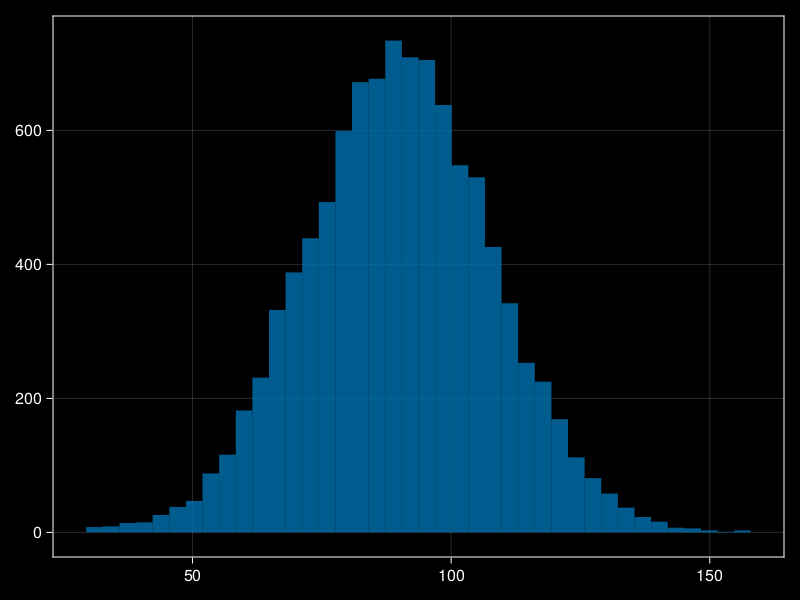

In [21]:
Weights = DataFrame(CSV.File("weights/Weights.csv", header = 2))
fig2 = hist(Weights.Weights, pdf = true, bins = 40)



In [22]:
save("weights/plots/histo_weights.png", fig2)

CairoMakie.Screen{IMAGE}


#### Exercise 12
Import the file AliceInWonderland.txt and count the number of words in the text.
#### Solution 12



In [23]:
alice = readline("AliceInWonderland.txt")

"I--DOWN THE RABBIT-HOLE Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do. Once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, \"and what is the use of a b" ⋯ 51185 bytes ⋯ "curious dream!\" said Alice. And she told her sister, as well as she could remember them, all these strange adventures of hers that you have just been reading about. Alice got up and ran off, thinking while she ran, as well she might, what a wonderful dream it had been."

Use the `split()` function to split the String into substrings each containing one word and then count its length. 

In [24]:
?split

search: split splitext splitdir splitpath splitdrive rsplit eachsplit splice!



```
split(str::AbstractString, dlm; limit::Integer=0, keepempty::Bool=true)
split(str::AbstractString; limit::Integer=0, keepempty::Bool=false)
```

Split `str` into an array of substrings on occurrences of the delimiter(s) `dlm`.  `dlm` can be any of the formats allowed by [`findnext`](@ref)'s first argument (i.e. as a string, regular expression or a function), or as a single character or collection of characters.

If `dlm` is omitted, it defaults to [`isspace`](@ref).

The optional keyword arguments are:

  * `limit`: the maximum size of the result. `limit=0` implies no maximum (default)
  * `keepempty`: whether empty fields should be kept in the result. Default is `false` without a `dlm` argument, `true` with a `dlm` argument.

See also [`rsplit`](@ref), [`eachsplit`](@ref).

# Examples

```jldoctest
julia> a = "Ma.rch"
"Ma.rch"

julia> split(a, ".")
2-element Vector{SubString{String}}:
 "Ma"
 "rch"
```


In [25]:
words =split( alice, [' ','-'], keepempty = false)

9785-element Vector{SubString{String}}:
 "I"
 "DOWN"
 "THE"
 "RABBIT"
 "HOLE"
 "Alice"
 "was"
 "beginning"
 "to"
 "get"
 "very"
 "tired"
 "of"
 ⋮
 "ran,"
 "as"
 "well"
 "she"
 "might,"
 "what"
 "a"
 "wonderful"
 "dream"
 "it"
 "had"
 "been."

In [26]:
length(words)

9785